In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = '../data/insurance_data.csv'  # Adjust the path if needed
df = pd.read_csv(data_path)

# Display basic information
print("Dataset loaded successfully.")
print(df.info())
print(df.head())


Dataset loaded successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1000 non-null   int64  
 1   Province     1000 non-null   object 
 2   Zipcode      1000 non-null   int64  
 3   Gender       1000 non-null   object 
 4   Total_Claim  1000 non-null   float64
 5   Premium      1000 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 47.0+ KB
None
   Unnamed: 0 Province  Zipcode  Gender  Total_Claim      Premium
0           0        C     1003  Female   652.740226   898.493109
1           1        A     1003  Female  1159.389368  1040.563548
2           2        C     1003    Male   729.641413  1137.593249
3           3        C     1003  Female   253.524198   764.332164
4           4        A     1001    Male   938.056933  1349.828367


In [3]:
# Feature Engineering
df['Claim_Ratio'] = df['Total_Claim'] / df['Premium']

# Check for any anomalies in Claim_Ratio
print(df['Claim_Ratio'].describe())

# Display the first few rows with the new feature
print(df.head())


count    1000.000000
mean        0.863058
std         0.553466
min         0.029566
25%         0.454172
50%         0.755210
75%         1.123479
max         4.909124
Name: Claim_Ratio, dtype: float64
   Unnamed: 0 Province  Zipcode  Gender  Total_Claim      Premium  Claim_Ratio
0           0        C     1003  Female   652.740226   898.493109     0.726483
1           1        A     1003  Female  1159.389368  1040.563548     1.114194
2           2        C     1003    Male   729.641413  1137.593249     0.641390
3           3        C     1003  Female   253.524198   764.332164     0.331694
4           4        A     1001    Male   938.056933  1349.828367     0.694945


In [4]:
# One-hot encoding for Province
province_encoded = pd.get_dummies(df['Province'], prefix='Province', drop_first=True)
df = pd.concat([df, province_encoded], axis=1)

# Label encoding for Gender
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

# Drop the original Province column (optional)
df.drop('Province', axis=1, inplace=True)

# Check the updated DataFrame
print(df.head())


   Unnamed: 0  Zipcode  Gender  Total_Claim      Premium  Claim_Ratio  \
0           0     1003       0   652.740226   898.493109     0.726483   
1           1     1003       0  1159.389368  1040.563548     1.114194   
2           2     1003       1   729.641413  1137.593249     0.641390   
3           3     1003       0   253.524198   764.332164     0.331694   
4           4     1001       1   938.056933  1349.828367     0.694945   

   Province_B  Province_C  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False       False  


In [5]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['Unnamed: 0', 'Total_Claim'])
y = df['Total_Claim']

# Split the data into training and testing sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the datasets
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (800, 6)
Testing set size: (200, 6)


Linear Regression Performance:
Training MSE: 18472.5301, R²: 0.9443
Testing MSE: 9823.5202, R²: 0.9644


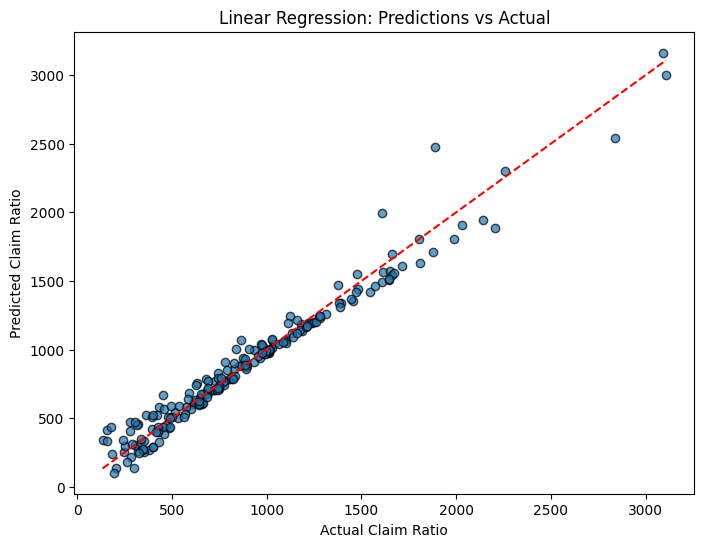

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize the model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Predict on both train and test sets
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Linear Regression Performance:")
print(f"Training MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"Testing MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

# Visualize predictions vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Linear Regression: Predictions vs Actual")
plt.xlabel("Actual Claim Ratio")
plt.ylabel("Predicted Claim Ratio")
plt.show()


Decision Tree Performance:
Training MSE: 10834.8665, R²: 0.9673
Testing MSE: 16190.7211, R²: 0.9413


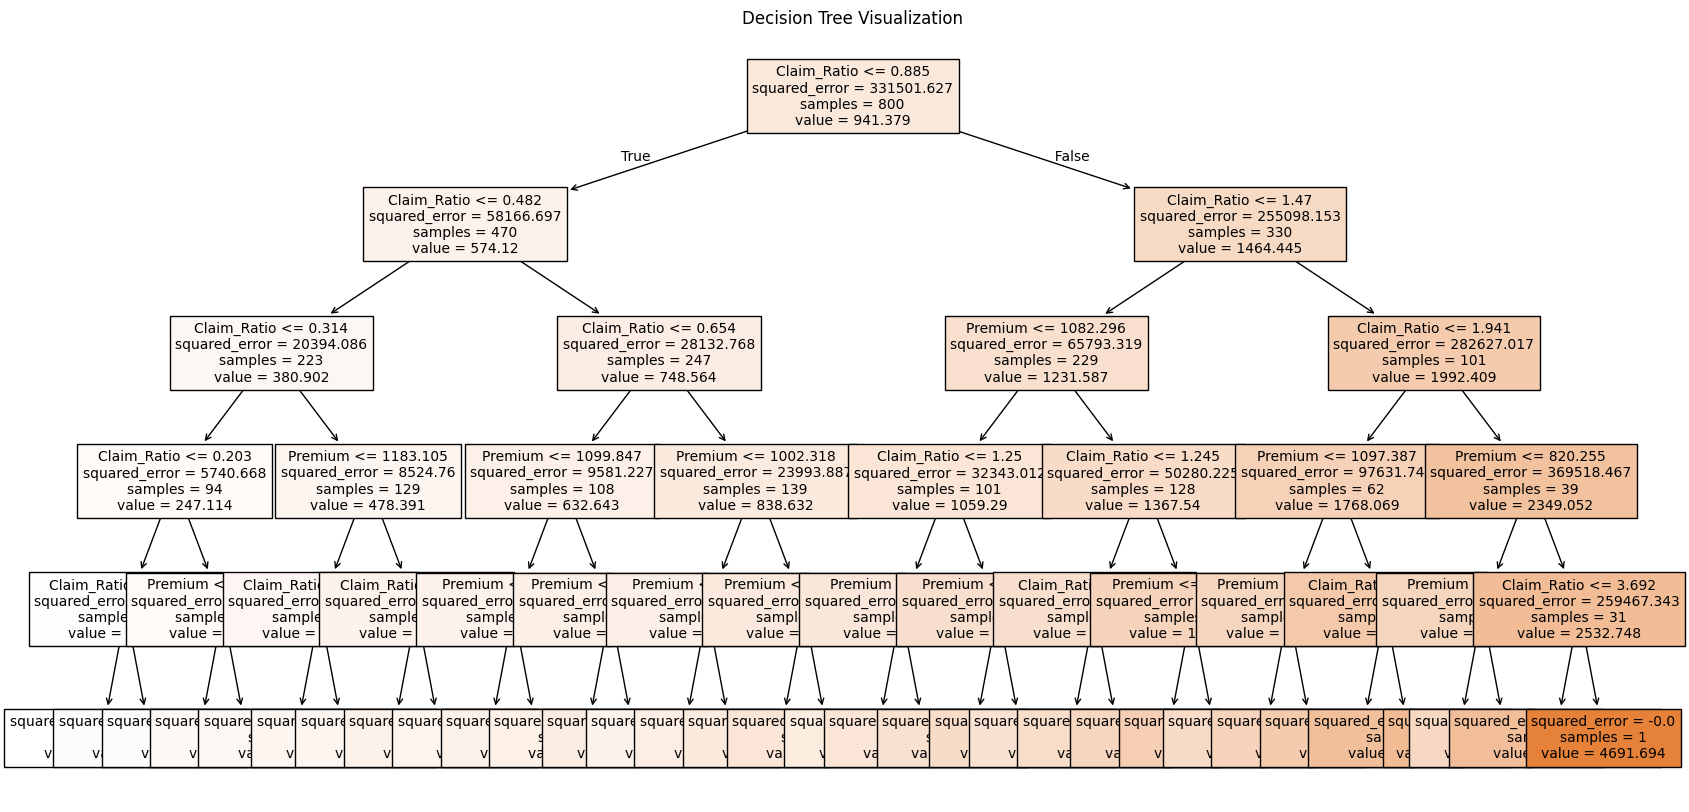

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

# Initialize the Decision Tree model
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Train the model
tree_model.fit(X_train, y_train)

# Predict on both train and test sets
y_train_tree_pred = tree_model.predict(X_train)
y_test_tree_pred = tree_model.predict(X_test)

# Evaluate the model
train_tree_mse = mean_squared_error(y_train, y_train_tree_pred)
test_tree_mse = mean_squared_error(y_test, y_test_tree_pred)
train_tree_r2 = r2_score(y_train, y_train_tree_pred)
test_tree_r2 = r2_score(y_test, y_test_tree_pred)

print("Decision Tree Performance:")
print(f"Training MSE: {train_tree_mse:.4f}, R²: {train_tree_r2:.4f}")
print(f"Testing MSE: {test_tree_mse:.4f}, R²: {test_tree_r2:.4f}")

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()


Decision Tree Performance:
Training MSE: 10834.8665, R²: 0.9673
Testing MSE: 16190.7211, R²: 0.9413


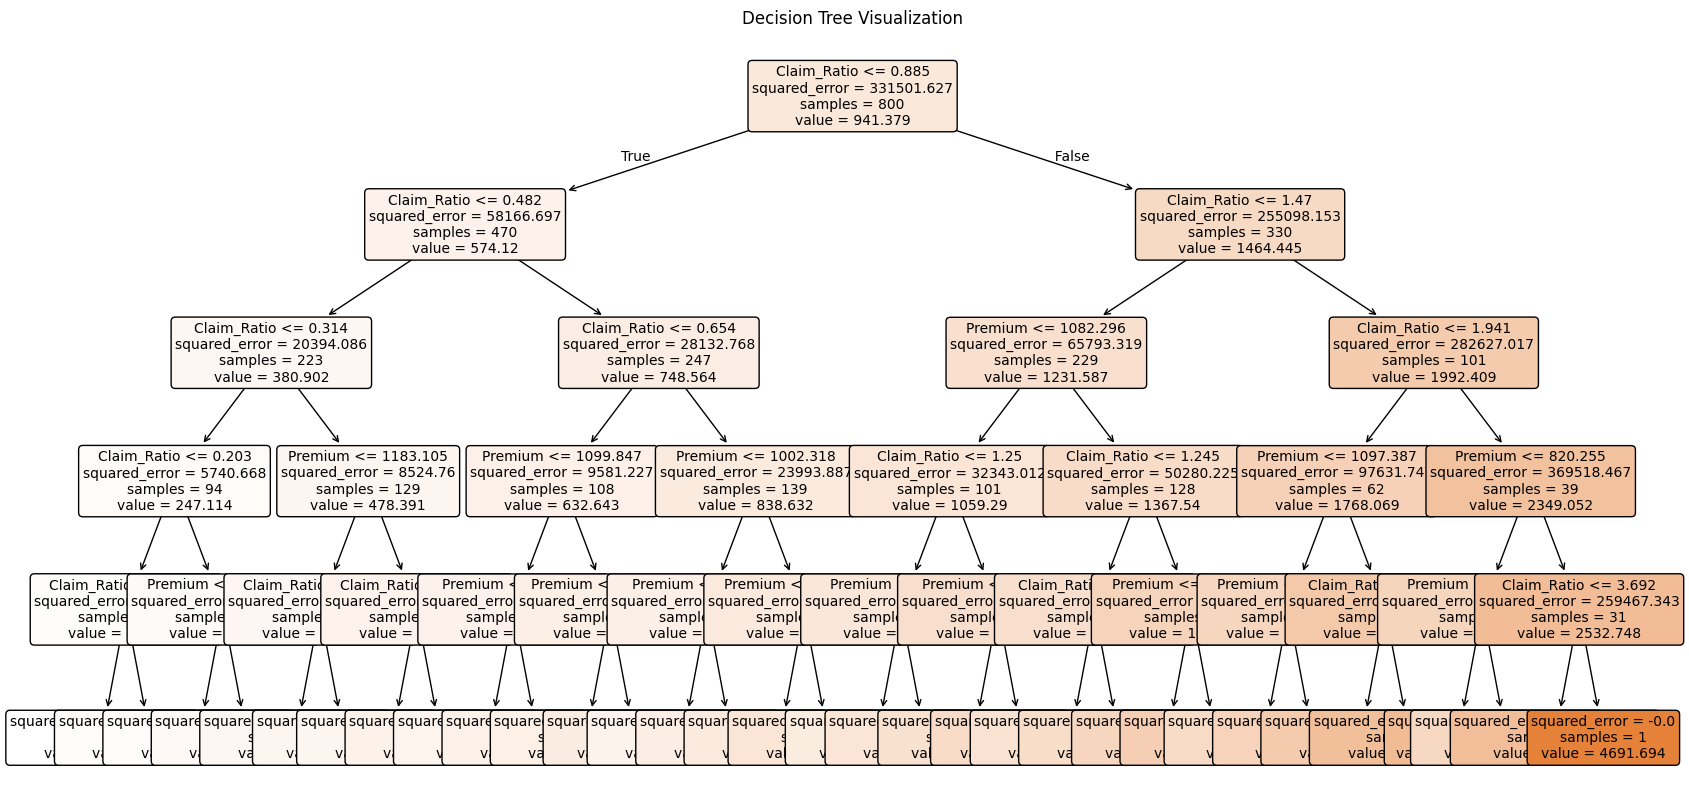

In [8]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Train the Decision Tree model
decision_tree = DecisionTreeRegressor(max_depth=5, random_state=42)  # You can adjust max_depth as needed
decision_tree.fit(X_train, y_train)

# Step 2: Evaluate the model
# Training set performance
y_train_pred = decision_tree.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Testing set performance
y_test_pred = decision_tree.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Decision Tree Performance:")
print(f"Training MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"Testing MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

# Step 3: Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    decision_tree, 
    feature_names=X_train.columns, 
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()


Random Forest Performance:
Training MSE: 924.9899, R²: 0.9972
Testing MSE: 2606.4487, R²: 0.9906


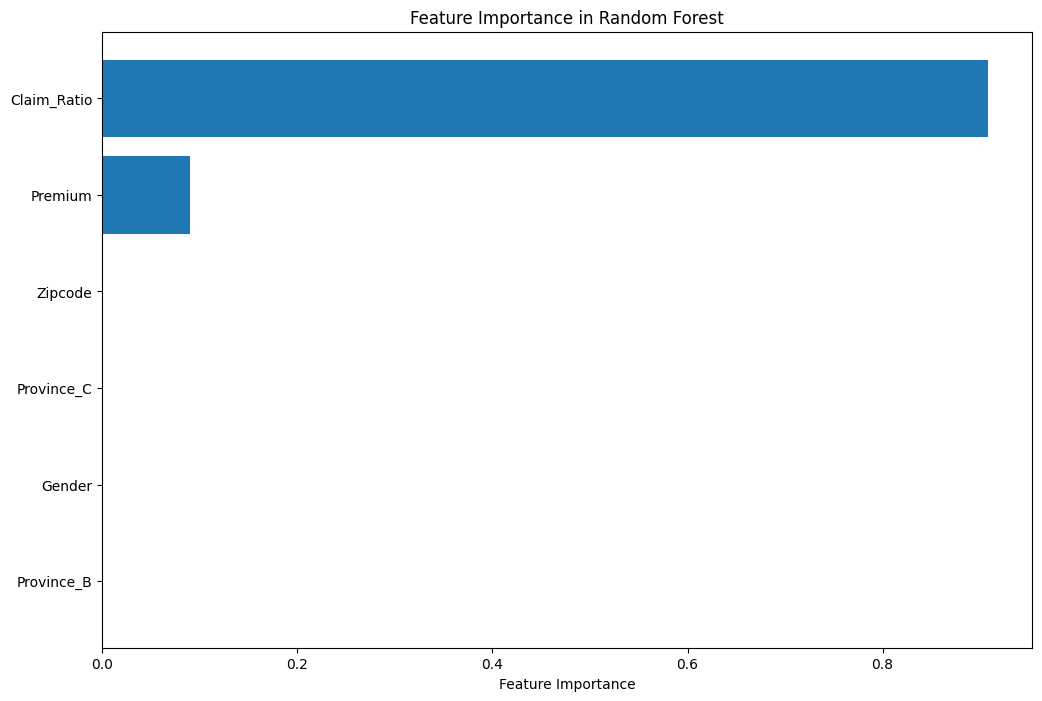

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)  # Adjust parameters as needed

# Train the model
random_forest.fit(X_train, y_train)

# Predict on both train and test sets
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Random Forest Performance:")
print(f"Training MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"Testing MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

# Feature Importance Visualization
importances = random_forest.feature_importances_
sorted_indices = importances.argsort()

plt.figure(figsize=(12, 8))
plt.barh(range(len(importances)), importances[sorted_indices], align='center')
plt.yticks(range(len(importances)), [X_train.columns[i] for i in sorted_indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest")
plt.show()


Performance Analysis
Training Set:

MSE: 924.99 suggests that the model is fitting well to the training data.

R^2: 0.9972 indicates that 99.72% of the variance in the target variable is explained by the features in the training set.
Testing Set:

MSE: 2606.45 is higher than the training MSE, but it is still quite low, showing strong generalization.
R ^2: 0.9906 suggests that 99.06% of the variance in the test target is explained by the features, indicating excellent predictive power.
Observations
The slight gap between training and testing performance (e.g., MSE values) indicates the model is well-tuned, with minimal overfitting.
The feature importance visualization (if plotted) can help identify the most impactful features in the dataset.

In [10]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    scoring='neg_mean_squared_error', 
    cv=3, 
    verbose=2, 
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Output the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated MSE:", -grid_search.best_score_)

# Train the best model on the training data
best_rf = grid_search.best_estimator_


Fitting 3 folds for each of 162 candidates, totalling 486 fits


c:\Users\Hp\Videos\week3\venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
243 fits failed out of a total of 486.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
123 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Hp\Videos\week3\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Hp\Videos\week3\venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\Hp\Videos\week3\venv\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Hp\Videos\w

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validated MSE: 24657.464060040806


In [11]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [10, 20, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt']
}

# Perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    scoring='neg_mean_squared_error',
    n_iter=50,  # Number of settings sampled
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# Output the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validated MSE:", -random_search.best_score_)

# Train the best model on the training data
best_rf = random_search.best_estimator_


Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\Users\Hp\Videos\week3\venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
78 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Hp\Videos\week3\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Hp\Videos\week3\venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\Hp\Videos\week3\venv\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Hp\Videos\wee

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 137}
Best Cross-Validated MSE: 24690.538612680906


In [12]:
# Predict on the test set
y_test_pred = best_rf.predict(X_test)

# Evaluate the fine-tuned model
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Fine-Tuned Random Forest Performance:")
print(f"Testing MSE: {test_mse:.4f}, R²: {test_r2:.4f}")


Fine-Tuned Random Forest Performance:
Testing MSE: 14334.2011, R²: 0.9480


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the specific hyperparameters
custom_rf = RandomForestRegressor(
    n_estimators=150,       # Number of trees
    max_depth=15,           # Maximum depth of each tree
    min_samples_split=5,    # Minimum samples required to split an internal node
    min_samples_leaf=2,     # Minimum samples required to be at a leaf node
    max_features='sqrt',    # Number of features to consider for each split
    random_state=42         # Ensures reproducibility
)

# Train the model
custom_rf.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = custom_rf.predict(X_train)
y_test_pred = custom_rf.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print("Fine-Tuned Random Forest Performance:")
print(f"Training MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"Testing MSE: {test_mse:.4f}, R²: {test_r2:.4f}")


Fine-Tuned Random Forest Performance:
Training MSE: 9645.4298, R²: 0.9709
Testing MSE: 16428.9864, R²: 0.9404


In [14]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=100,       # Number of boosting rounds
    max_depth=6,            # Maximum depth of a tree
    learning_rate=0.1,      # Step size shrinkage
    random_state=42         # Ensures reproducibility
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("XGBoost Performance:")
print(f"Training MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"Testing MSE: {test_mse:.4f}, R²: {test_r2:.4f}")


XGBoost Performance:
Training MSE: 74.6546, R²: 0.9998
Testing MSE: 8121.0148, R²: 0.9706


In [ ]:
import shap

# Initialize SHAP explainer
explainer = shap.Explainer(xgb_model, X_train)

# Compute SHAP values (make sure this step is correct)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

# Dependence plot for a specific feature (make sure 'Claim_Ratio' exists in your dataset)
shap.dependence_plot("Claim_Ratio", shap_values, X_test)


In [24]:
from sklearn.preprocessing import LabelEncoder

# Identify non-numeric columns
non_numeric_columns = X_train.select_dtypes(exclude=['number']).columns

# Encode categorical columns
label_encoder = LabelEncoder()
for col in non_numeric_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])


In [18]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)



In [31]:
 # Should match the number of rows in shap_values
  # Should be <class 'shap.explanation.Explanation'>


(200, 6)


In [35]:
shap_values_array = shap_values.values  # This should be a numpy array or pandas DataFrame


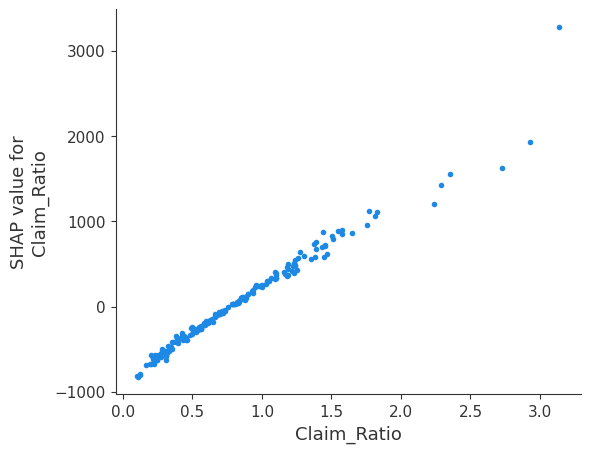

In [37]:
shap.dependence_plot("Claim_Ratio", shap_values_array, X_test, interaction_index=None)



In [39]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train XGBoost model
xgb_model = xgb.XGBRegressor(
    n_estimators=150,       # Number of boosting rounds
    max_depth=5,             # Maximum depth of trees
    learning_rate=0.1,      # Step size
    random_state=42         # Ensures reproducibility
)
xgb_model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
train_mse_xgb = mean_squared_error(y_train, y_train_pred_xgb)
test_mse_xgb = mean_squared_error(y_test, y_test_pred_xgb)
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

# Print the results
print("XGBoost Performance:")
print(f"Training MSE: {train_mse_xgb:.4f}, R²: {train_r2_xgb:.4f}")
print(f"Testing MSE: {test_mse_xgb:.4f}, R²: {test_r2_xgb:.4f}")


XGBoost Performance:
Training MSE: 73.5013, R²: 0.9998
Testing MSE: 5744.9040, R²: 0.9792


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

# Evaluate the model
train_mse_lr = mean_squared_error(y_train, y_train_pred_lr)
test_mse_lr = mean_squared_error(y_test, y_test_pred_lr)
train_r2_lr = r2_score(y_train, y_train_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)

# Print the results
print("Linear Regression Performance:")
print(f"Training MSE: {train_mse_lr:.4f}, R²: {train_r2_lr:.4f}")
print(f"Testing MSE: {test_mse_lr:.4f}, R²: {test_r2_lr:.4f}")


Linear Regression Performance:
Training MSE: 18472.5301, R²: 0.9443
Testing MSE: 9823.5202, R²: 0.9644


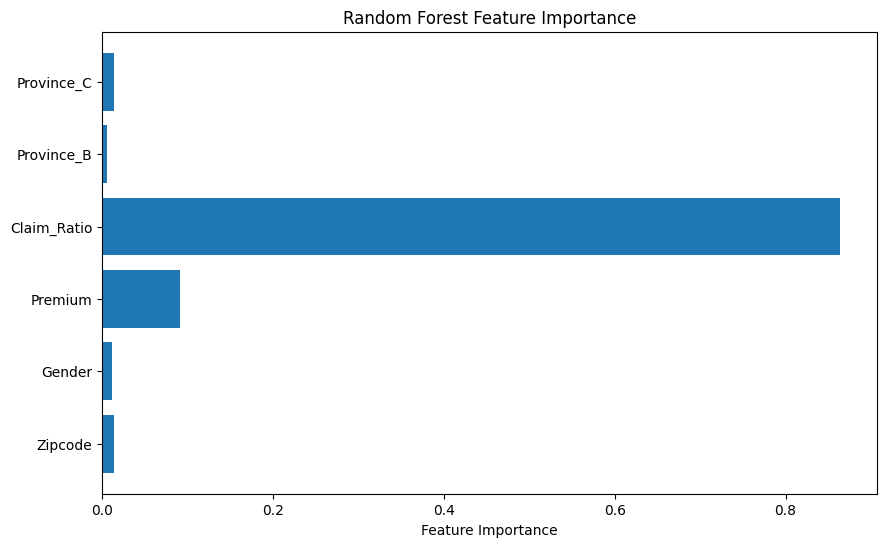

In [41]:
import matplotlib.pyplot as plt

# Feature importance
feature_importance = custom_rf.feature_importances_
features = X_train.columns  # Make sure X_train is a DataFrame with column names

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()
